In [3]:
#Узнать, уйдет ли абонент в отток

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [6]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [7]:
#EDA

In [8]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [10]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

<Axes: xlabel='Churn', ylabel='count'>

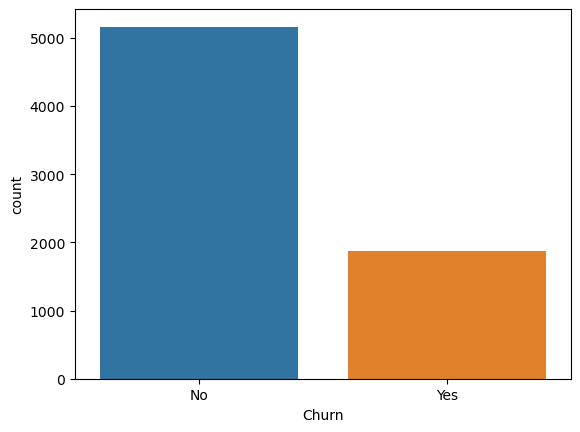

In [13]:
sns.countplot(x='Churn', data = df, hue='Churn')

<Axes: xlabel='Churn', ylabel='TotalCharges'>

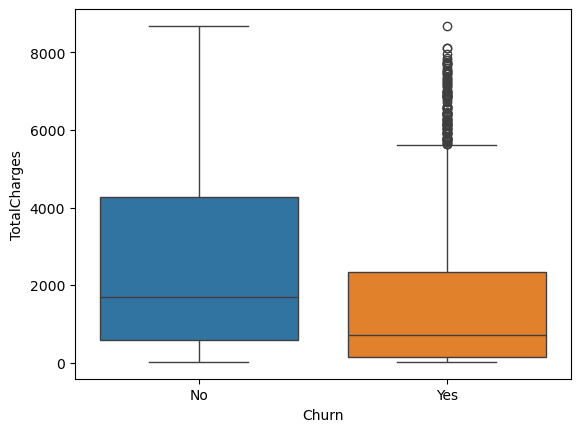

In [14]:
sns.boxplot(data=df, x = 'Churn', y = 'TotalCharges', hue = 'Churn')

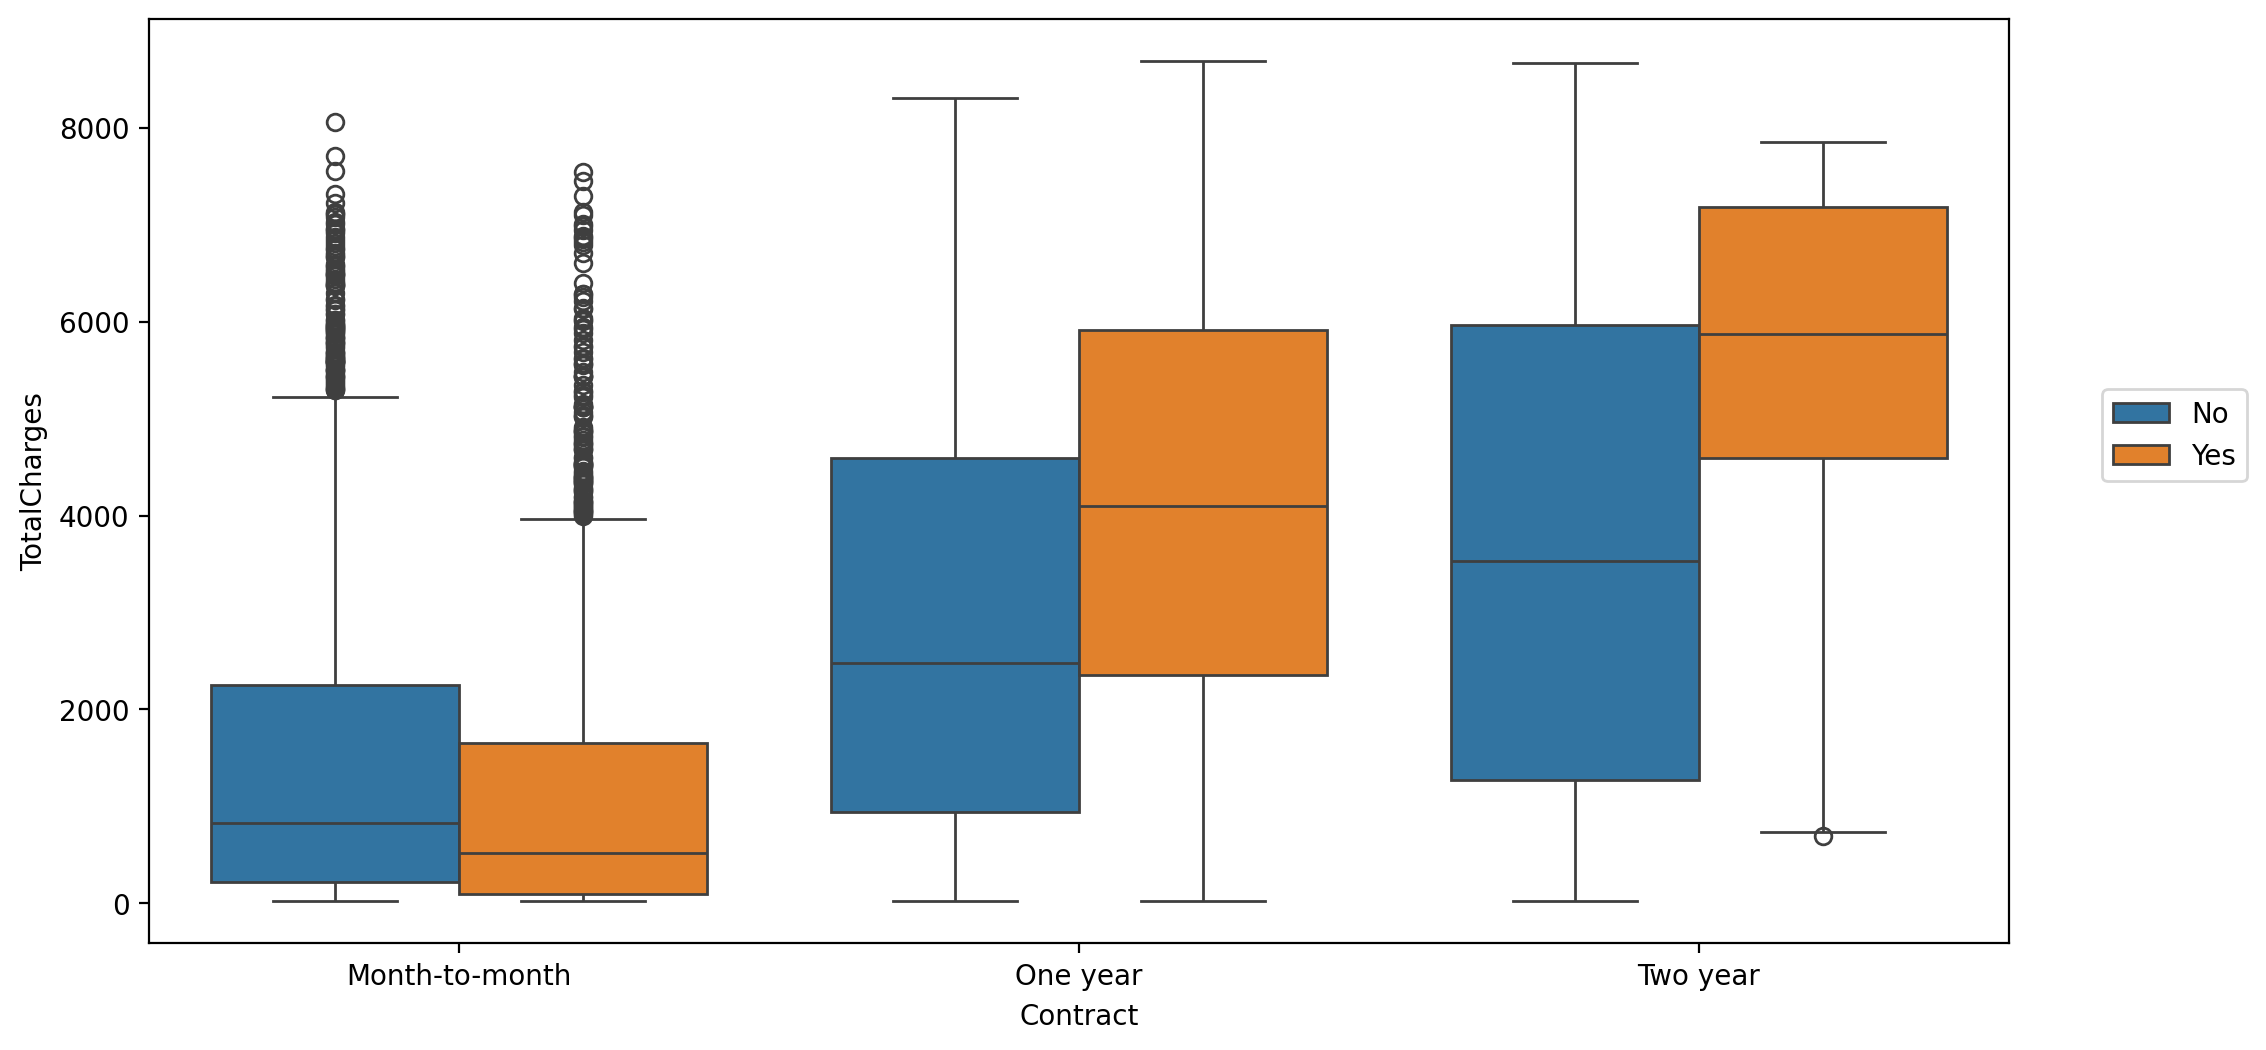

In [15]:
plt.figure(figsize=(12,6),dpi=200)
sns.boxplot(data=df, x = 'Contract', y = 'TotalCharges', hue = 'Churn')
plt.legend(loc = (1.05,0.5))

In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

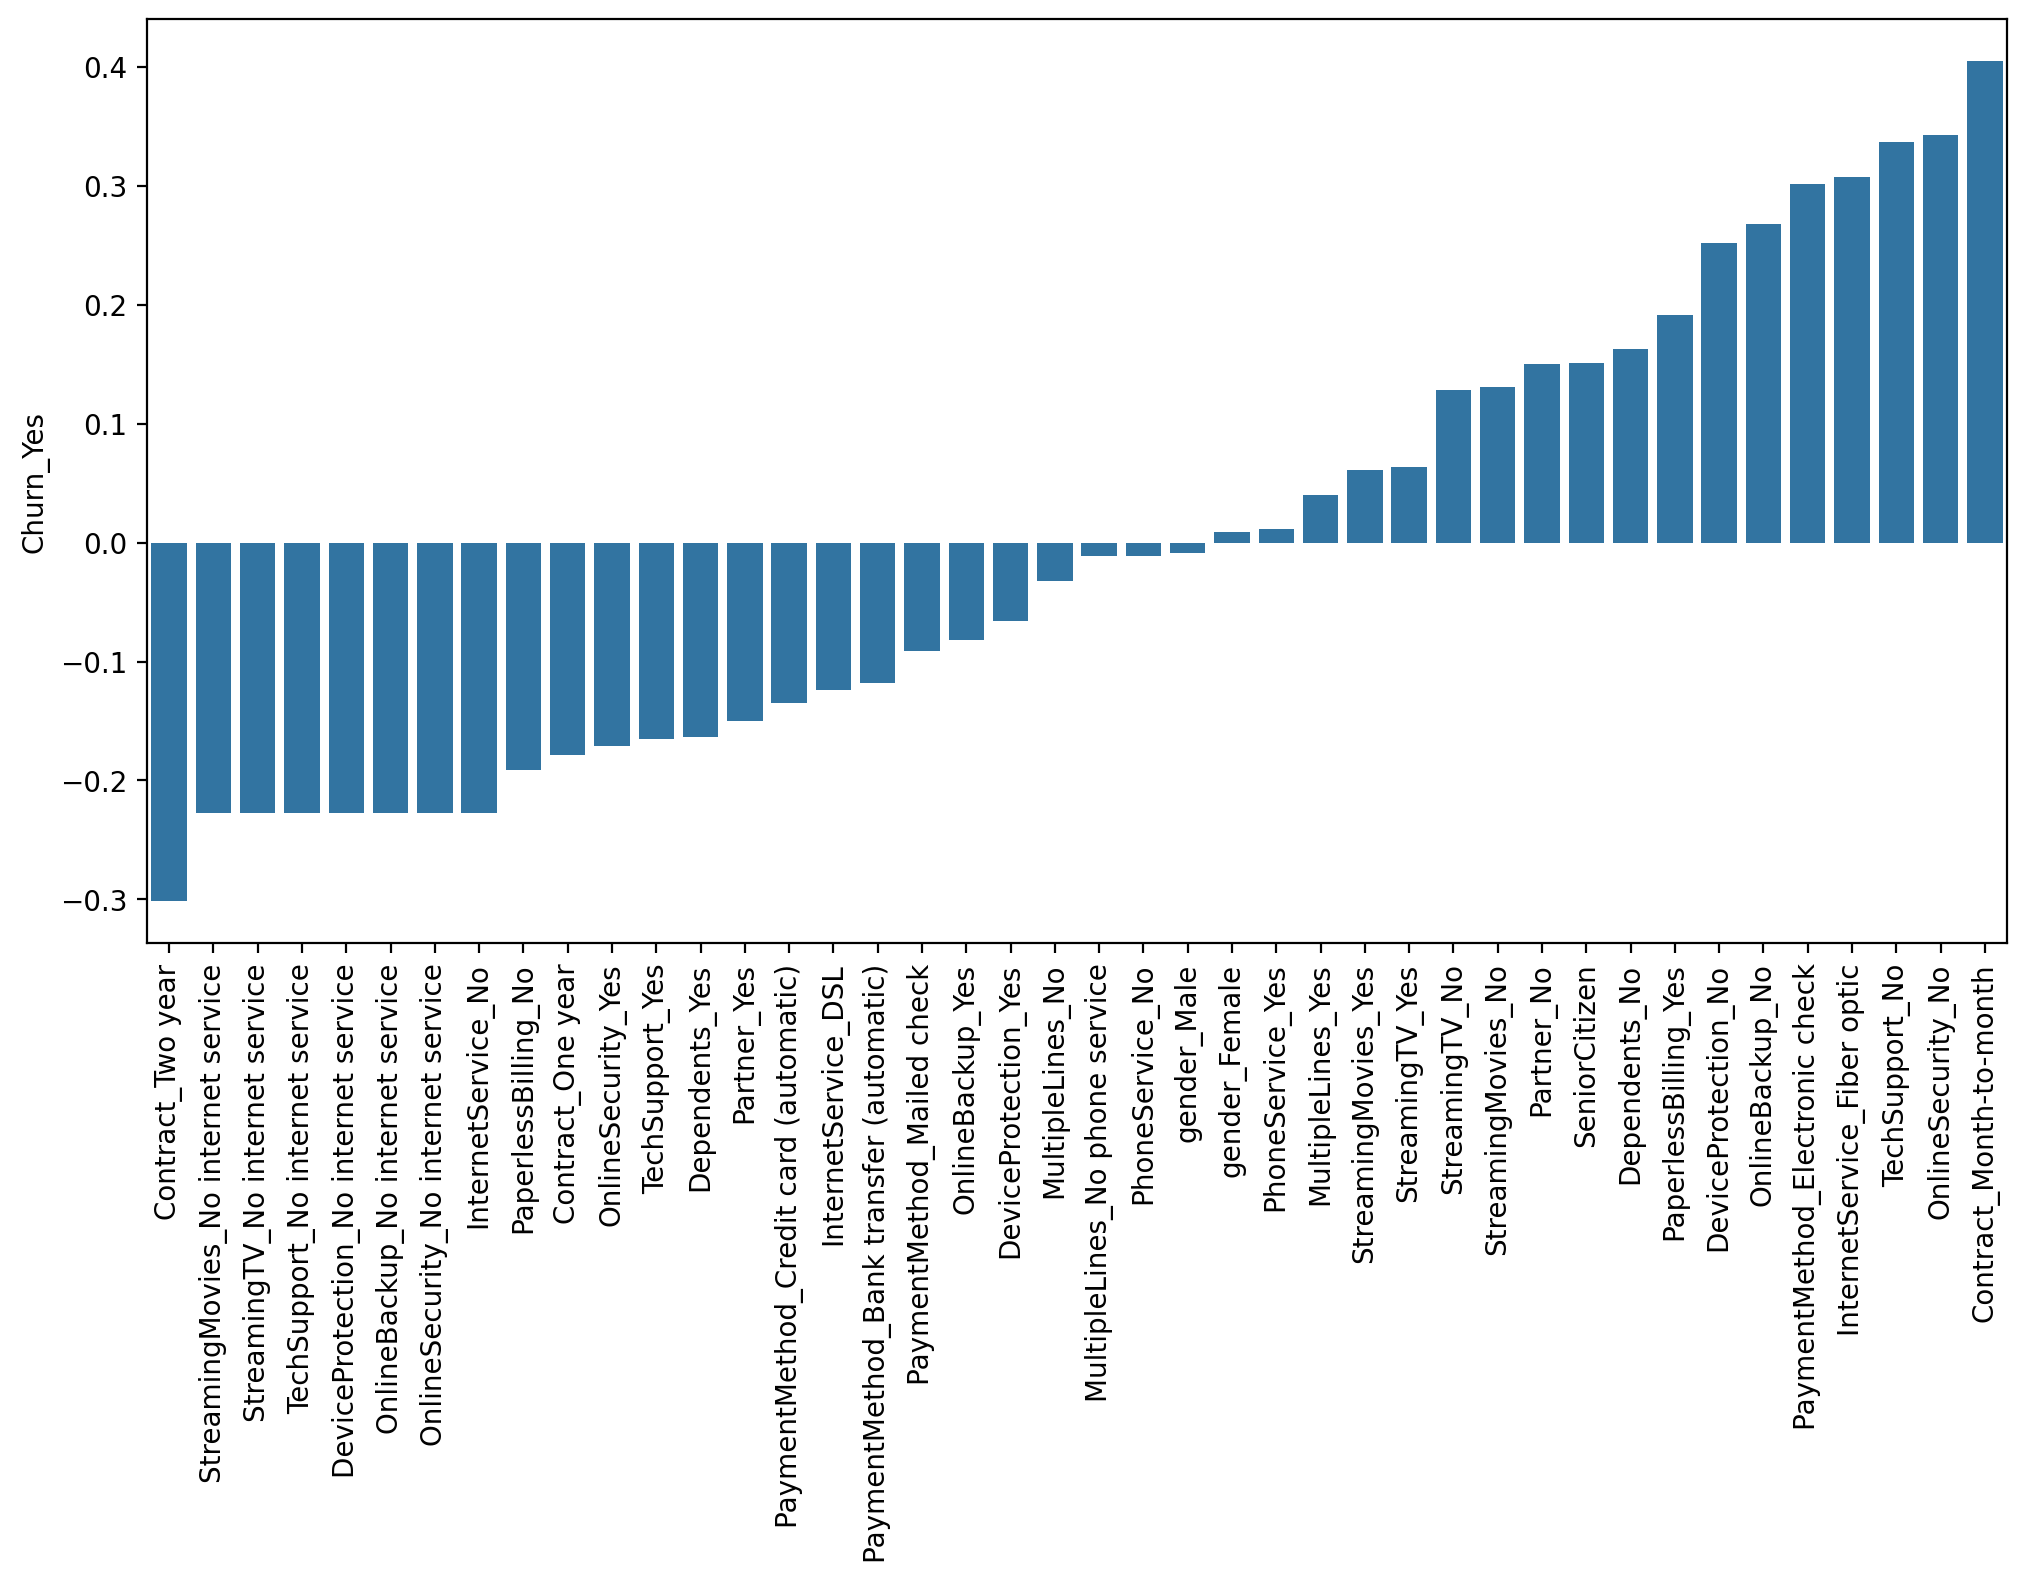

In [17]:
#Смотрим корреляцию признаков
df_corr = pd.get_dummies(df.drop(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'], axis=1))
df_corr.corr()['Churn_Yes'].sort_values()

plt.figure(figsize=(12,6),dpi=200)
df_forbar = df_corr.corr()['Churn_Yes'].sort_values().drop(['Churn_No', 'Churn_Yes'])
sns.barplot(df_forbar)
plt.xticks(rotation=90)
plt.show()

In [18]:
#Далее сегментируем абонентов

In [19]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<Figure size 1200x600 with 0 Axes>

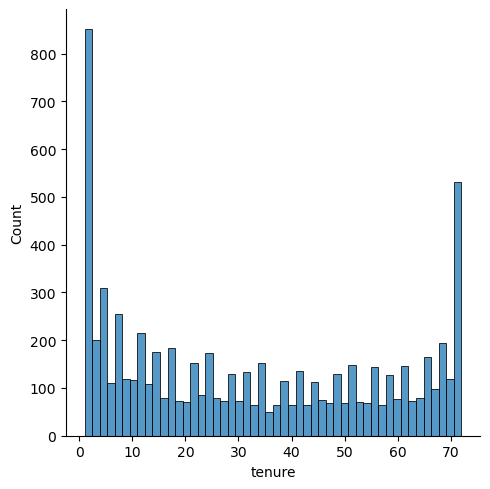

In [20]:
plt.figure(figsize=(12,6))
sns.displot(x = 'tenure', data=df,bins=50);

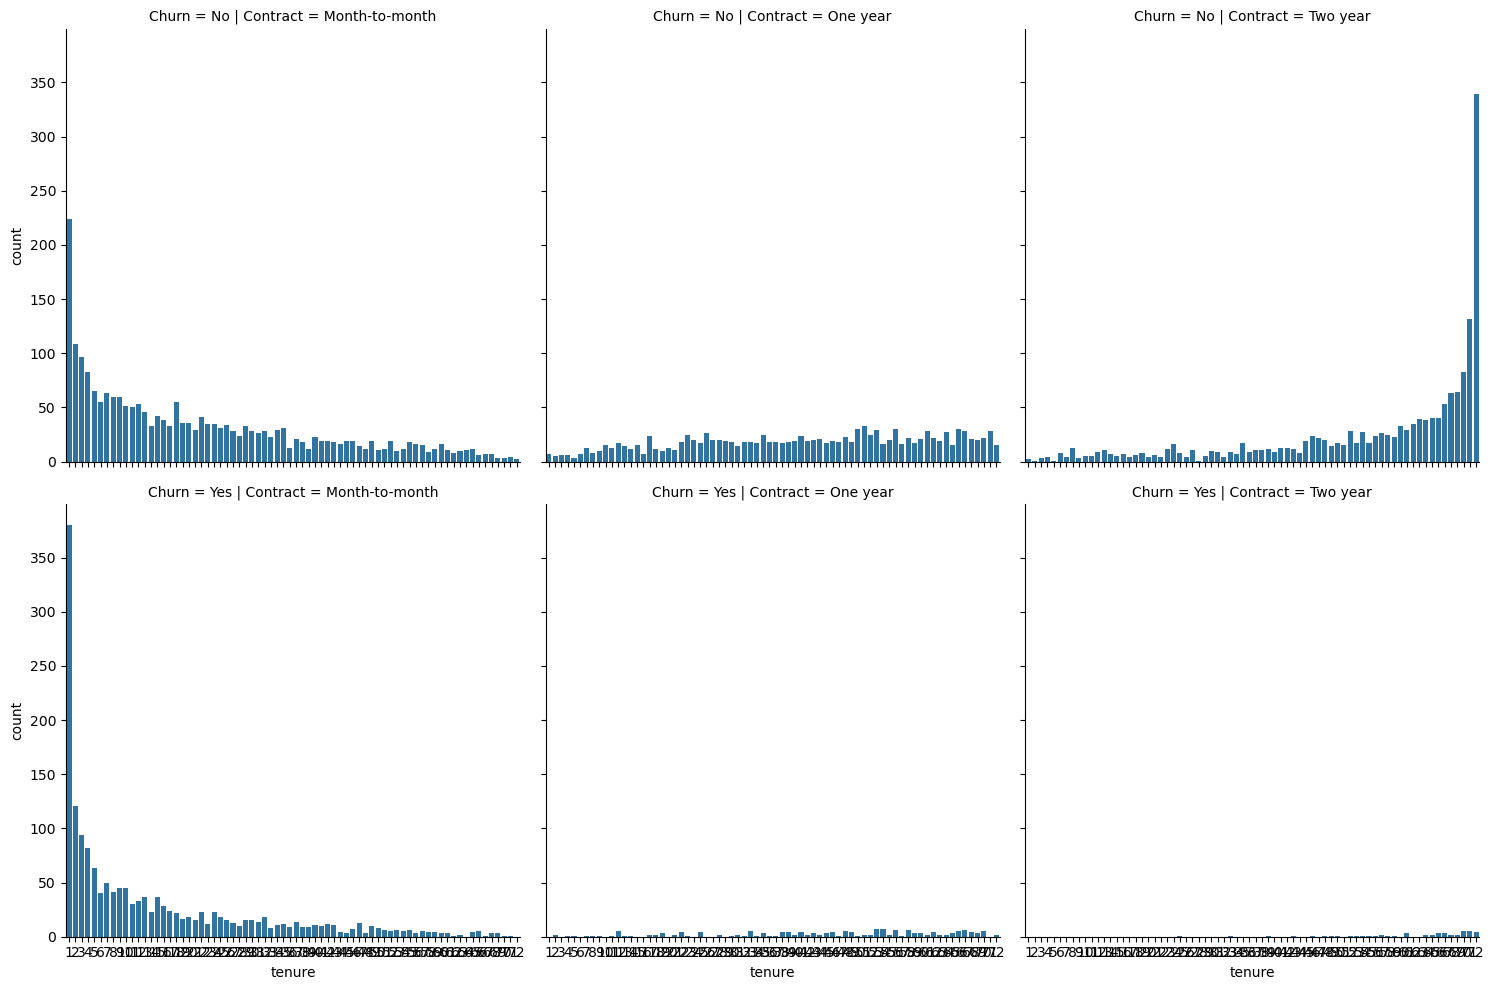

In [21]:
sns.catplot(data=df, x = 'tenure', row = 'Churn', col = 'Contract', kind='count')


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

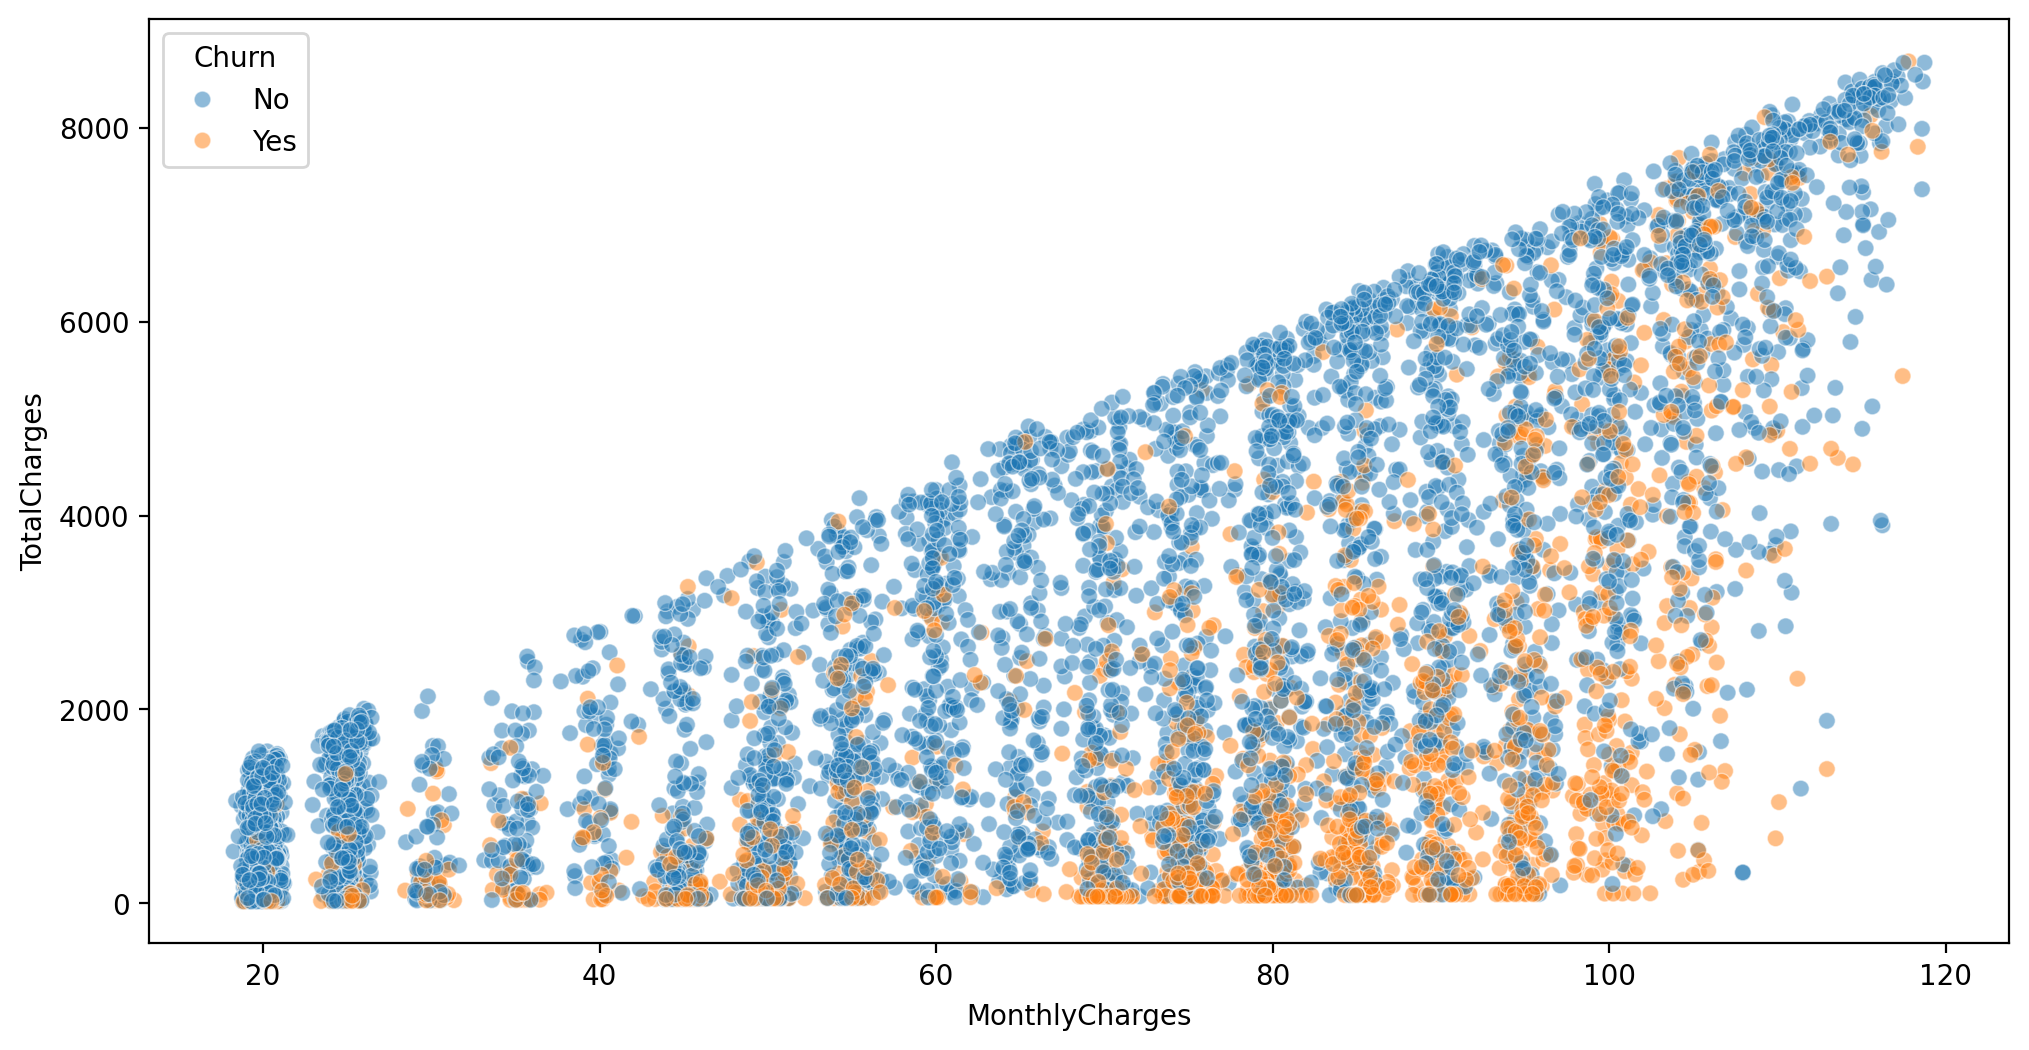

In [22]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=df, x = 'MonthlyCharges', y = 'TotalCharges', hue ='Churn', alpha = 0.5)

In [23]:
df['tenure'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72], dtype=int64)

In [24]:
tenure_list = []
for n in range(1, 73):
    tenure_i = len(df[df['tenure'] == n][df['Churn'] == 'Yes'])*100/len(df[df['tenure'] == n])
    tenure_list.append(tenure_i)

C:\Users\snoga\AppData\Local\Temp\ipykernel_12428\1079485210.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tenure_i = len(df[df['tenure'] == n][df['Churn'] == 'Yes'])*100/len(df[df['tenure'] == n])
C:\Users\snoga\AppData\Local\Temp\ipykernel_12428\1079485210.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tenure_i = len(df[df['tenure'] == n][df['Churn'] == 'Yes'])*100/len(df[df['tenure'] == n])
C:\Users\snoga\AppData\Local\Temp\ipykernel_12428\1079485210.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tenure_i = len(df[df['tenure'] == n][df['Churn'] == 'Yes'])*100/len(df[df['tenure'] == n])
C:\Users\snoga\AppData\Local\Temp\ipykernel_12428\1079485210.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tenure_i = len(df[df['tenure'] == n][df['Churn'] == 'Yes'])*100/len(df[df['tenure'] == n])
C:\Users\snoga\AppData\Local\Temp\ipykernel_12428\107948

In [25]:
tenure_series = pd.Series(index = range(1,73), data = tenure_list)

Text(0, 0.5, 'Percentage of Churn')

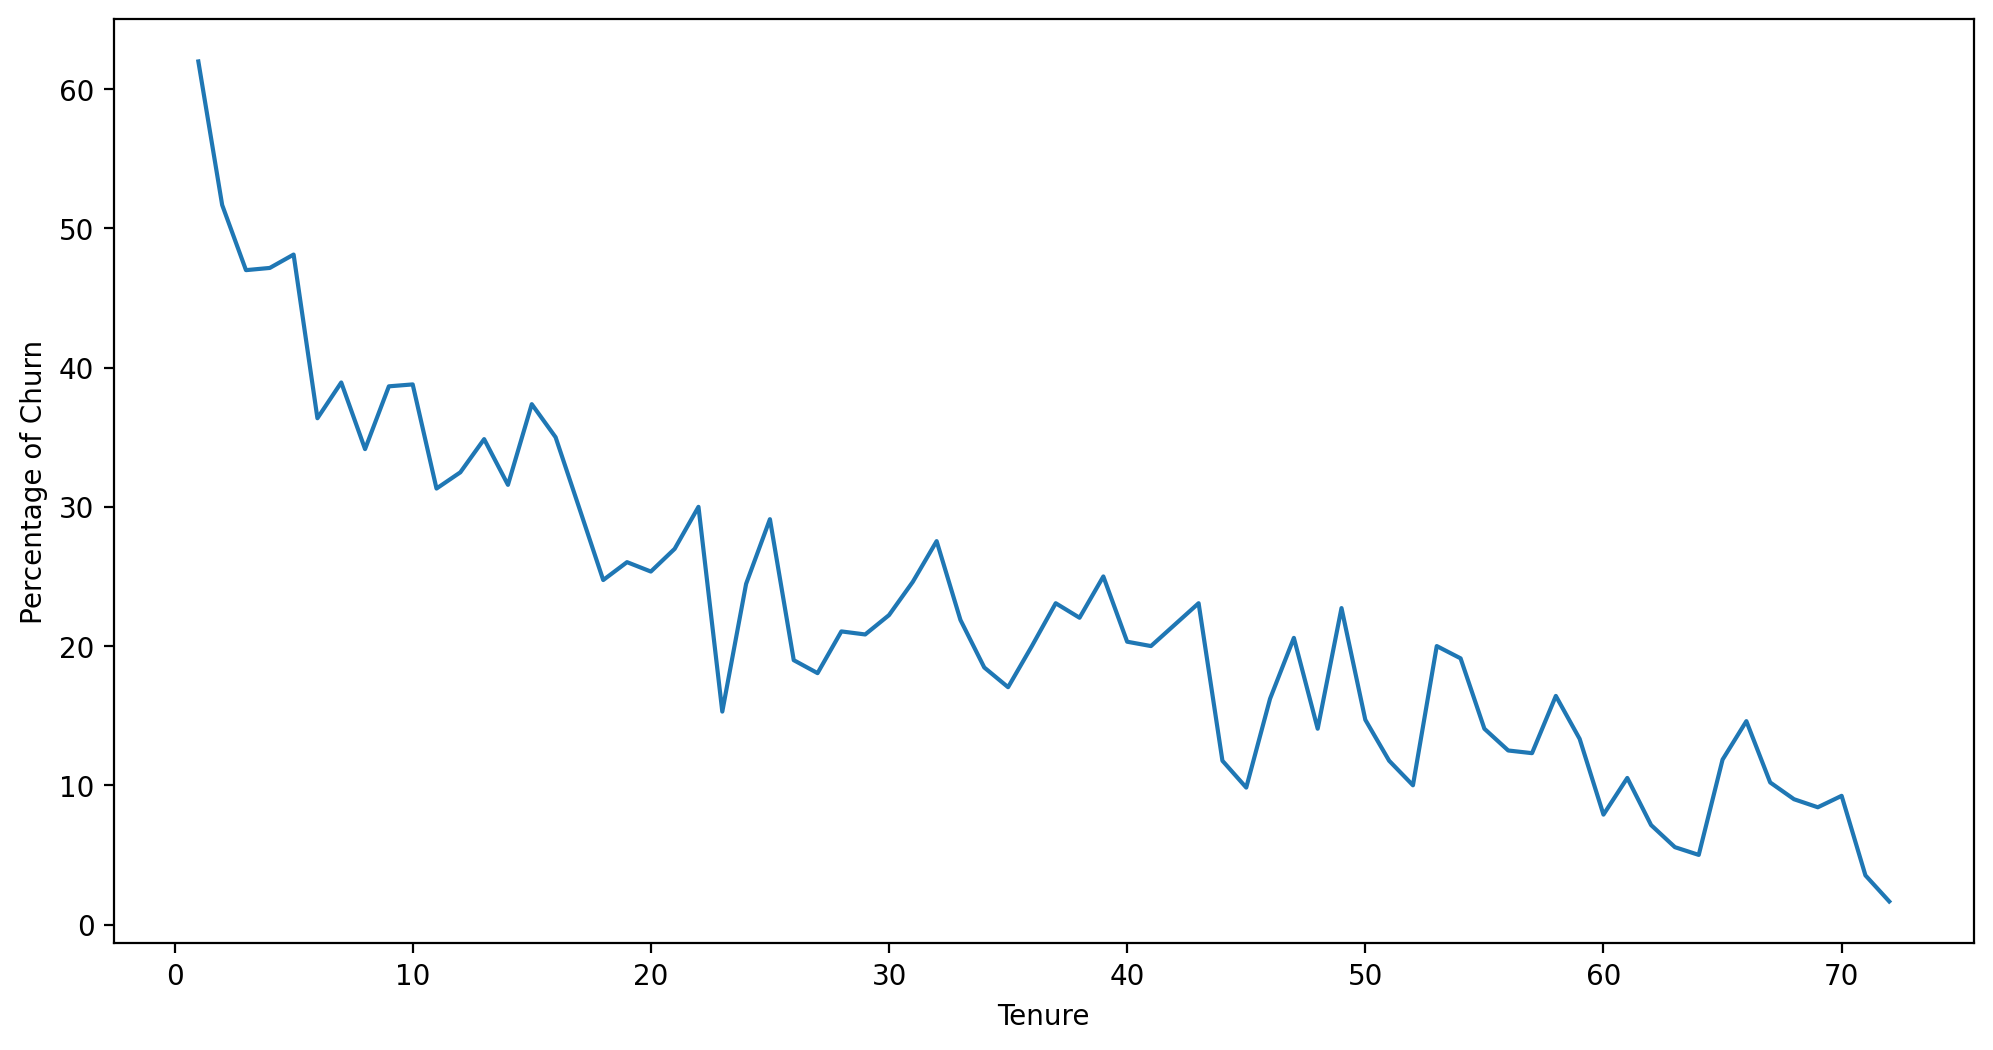

In [26]:
plt.figure(figsize = (12,6),dpi=200)
plt.plot(tenure_series)
plt.xlabel('Tenure')
plt.ylabel('Percentage of Churn')

In [27]:
#Делим на 4 категории по месяцам
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'
        
df['Tenure Cohort'] = df['tenure'].apply(cohort)
df.head()[['tenure','Tenure Cohort']]

tenure Tenure Cohort
0       1   0-12 Months
1      34  24-48 Months
2       2   0-12 Months
3      45  24-48 Months
4       2   0-12 Months

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

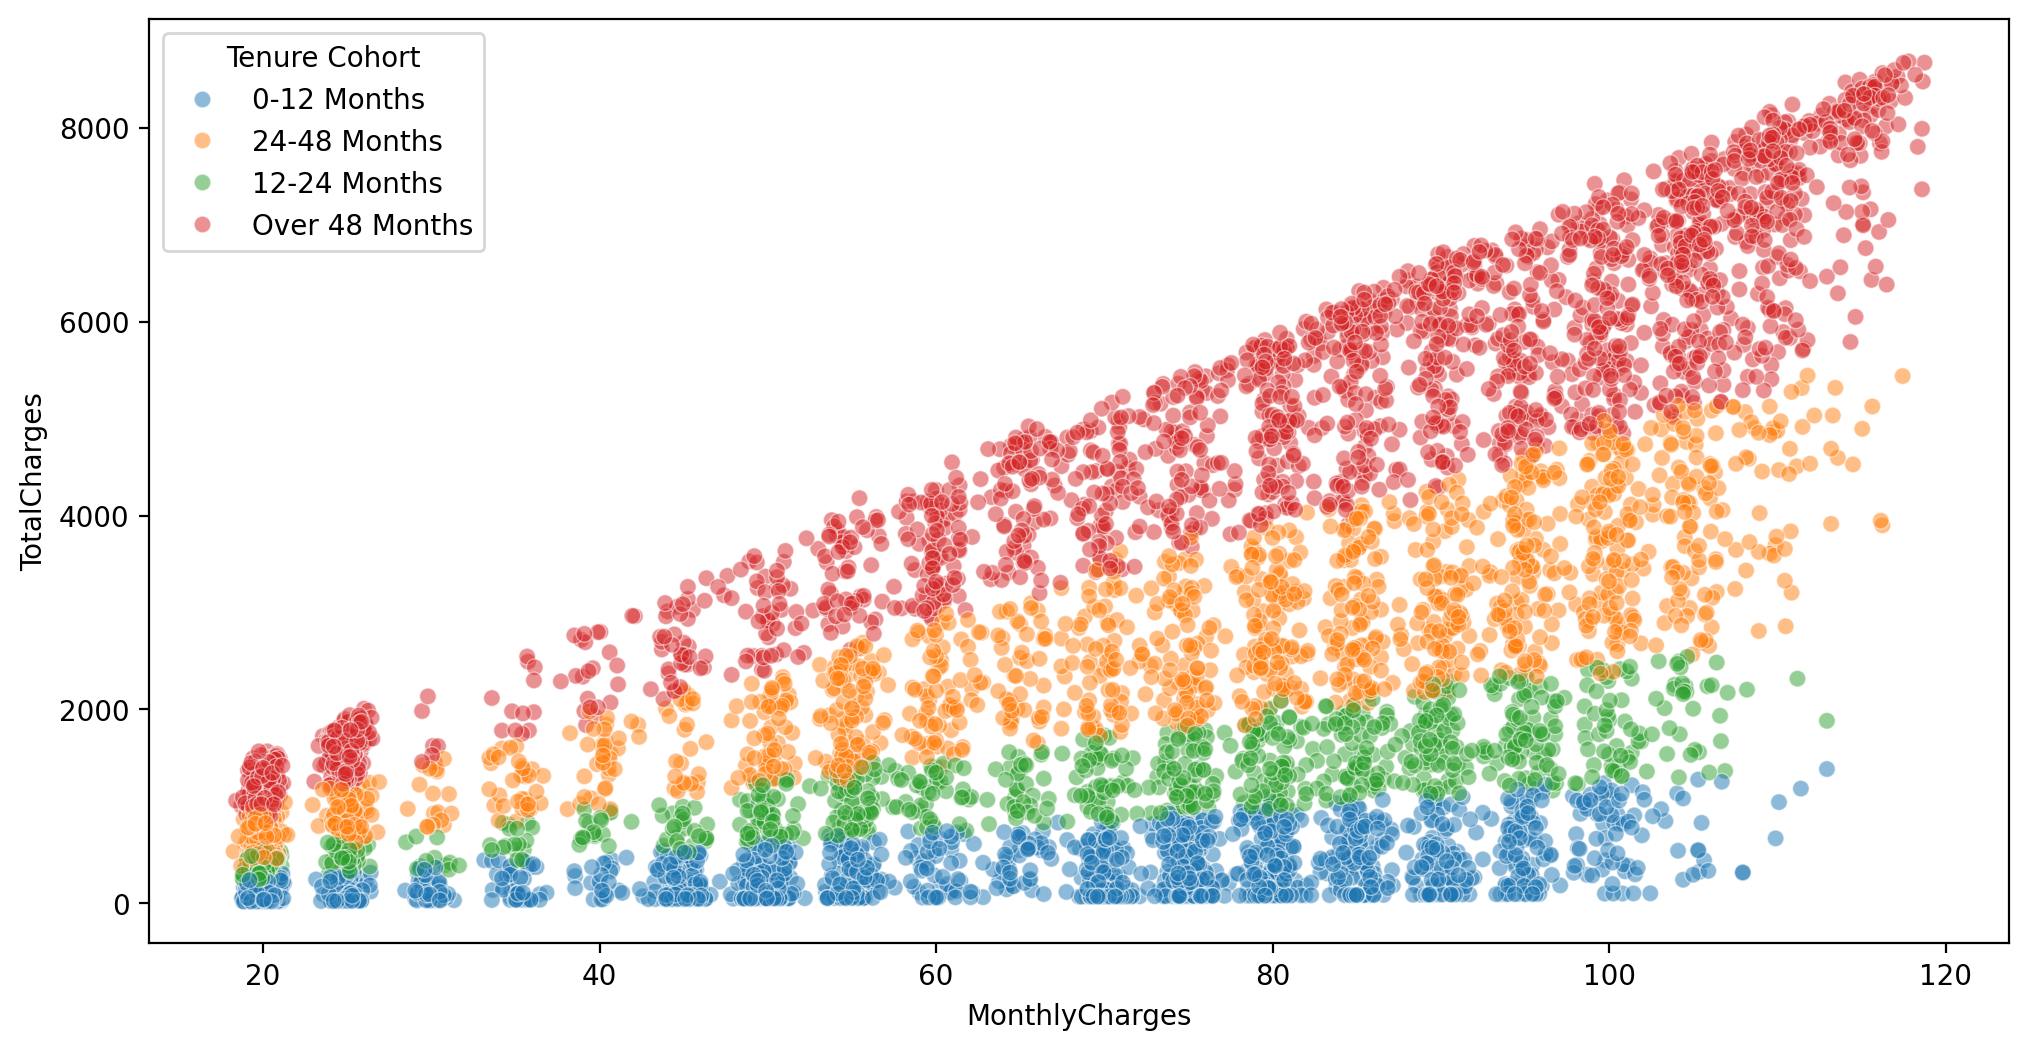

In [28]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(data=df, x = 'MonthlyCharges', y = 'TotalCharges', hue ='Tenure Cohort', alpha = 0.5)

<Axes: xlabel='Tenure Cohort', ylabel='count'>

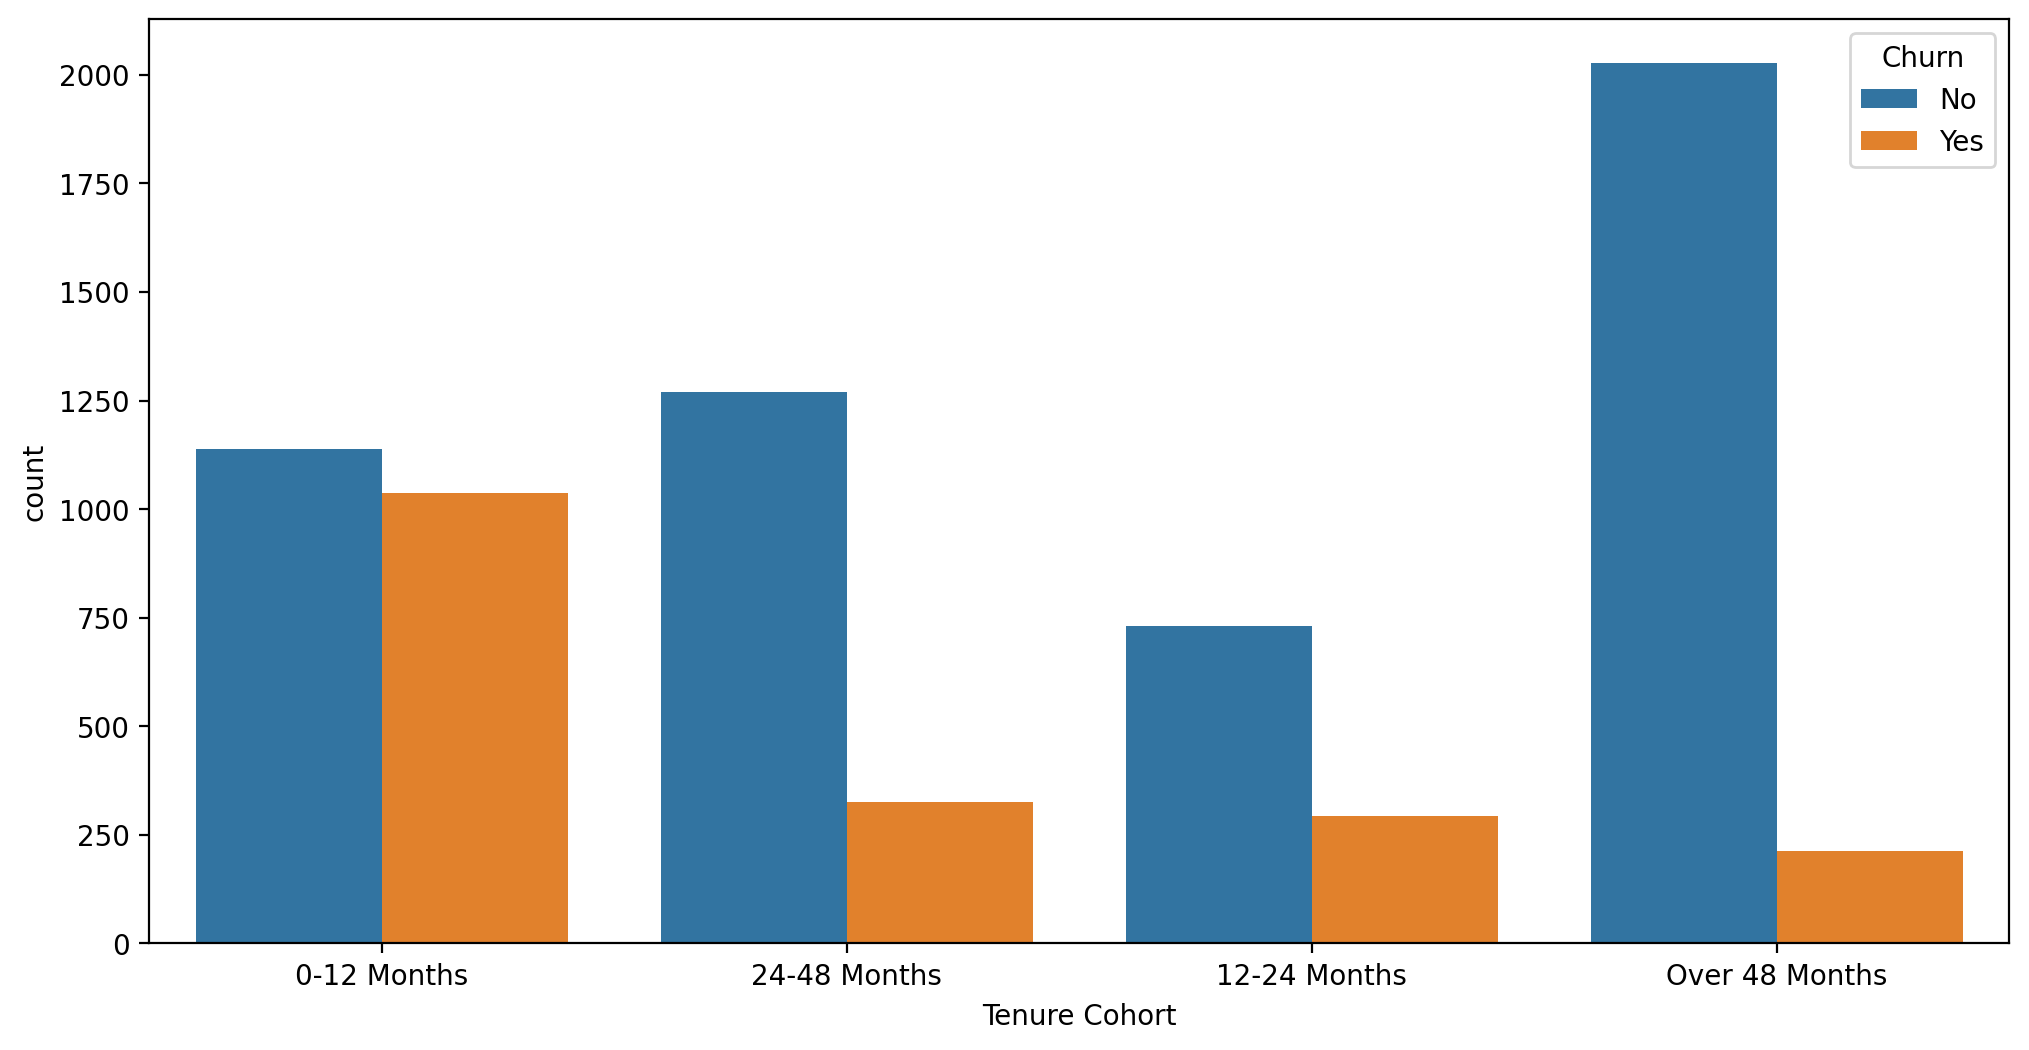

In [29]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(x = 'Tenure Cohort', data = df, hue = 'Churn')

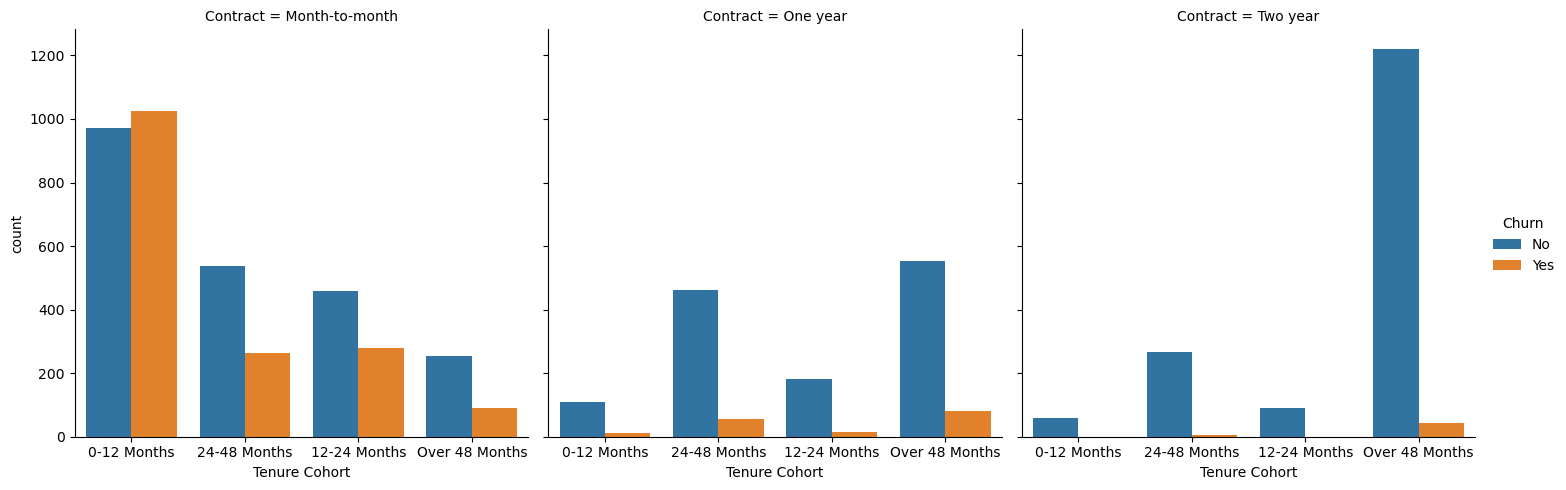

In [30]:
sns.catplot(kind = 'count', data = df, x = 'Tenure Cohort', col = 'Contract', hue = 'Churn');

In [31]:
#Далее модели на основе деревьев и бустинга

In [32]:
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7027  6840-RESVB    Male              0     Yes        Yes      24   
7028  2234-XADUH  Female              0     Yes        Yes      72   
7029  4801-JZAZL  Female              0     Yes        Yes      11   
7030  8361-LTMKD    Male              1     Yes         No       4   
7031  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7027          Yes               Yes             DSL            Yes  ...   
7028          Yes               Yes     Fiber optic             No  ...   
7029           No  No phone service             DSL            Yes  ...   
7030          Yes               Yes     Fiber optic             No  ...   
7031          Yes                No     Fiber optic            Yes  ...   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No          No              No  Month-to-month              Yes   
1             No          No              No        One year               No   
2             No          No              No  Month-to-month              Yes   
3            Yes          No              No        One year               No   
4             No          No              No  Month-to-month              Yes   
...          ...         ...             ...             ...              ...   
7027         Yes         Yes             Yes        One year              Yes   
7028          No         Yes             Yes        One year              Yes   
7029          No          No              No  Month-to-month              Yes   
7030          No          No              No  Month-to-month              Yes   
7031         Yes         Yes             Yes        Two year              Yes   

                  PaymentMethod MonthlyCharges TotalCharges  Churn  \
0              Electronic check          29.85        29.85     No   
1                  Mailed check          56.95      1889.50     No   
2                  Mailed check          53.85       108.15    Yes   
3     Bank transfer (automatic)          42.30      1840.75     No   
4              Electronic check          70.70       151.65    Yes   
...                         ...            ...          ...    ...   
7027               Mailed check          84.80      1990.50     No   
7028    Credit card (automatic)         103.20      7362.90     No   
7029           Electronic check          29.60       346.45     No   
7030               Mailed check          74.40       306.60    Yes   
7031  Bank transfer (automatic)         105.65      6844.50     No   

       Tenure Cohort  
0        0-12 Months  
1       24-48 Months  
2        0-12 Months  
3       24-48 Months  
4        0-12 Months  
...              ...  
7027    12-24 Months  
7028  Over 48 Months  
7029     0-12 Months  
7030     0-12 Months  
7031  Over 48 Months  

[7032 rows x 22 columns]

In [33]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure Cohort'],
      dtype='object')

In [34]:
df1 = pd.get_dummies(df.drop(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'], axis=1), drop_first = True).astype(int)
df1['tenure'] = df['tenure']
df1['MonthlyCharges'] = df['MonthlyCharges']
df1['TotalCharges'] = df['TotalCharges']

X = df1.drop('Churn_Yes', axis=1)
y = df1['Churn_Yes']

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [37]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV


In [38]:
simple_tree_model = DecisionTreeClassifier()
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(model_preds, y_test))
    
    print('\n')

    fig = plt.figure(figsize = (10,10))
    cm = confusion_matrix(model_preds, y_test)
    conf_plot = ConfusionMatrixDisplay(confusion_matrix = cm)
    conf_plot.plot();
    
    #plot_tree(simple_tree_model_plot, feature_names = X.columns, filled = True)

param_grid = {'max_depth': [2,3,4,5,6], 'max_leaf_nodes':[2,3,4,5,6]}
grid = GridSearchCV(simple_tree_model, param_grid)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 2, 'max_leaf_nodes': 3}

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       620
           1       0.34      0.60      0.43        84

    accuracy                           0.81       704
   macro avg       0.64      0.72      0.66       704
weighted avg       0.87      0.81      0.83       704





<Figure size 1000x1000 with 0 Axes>

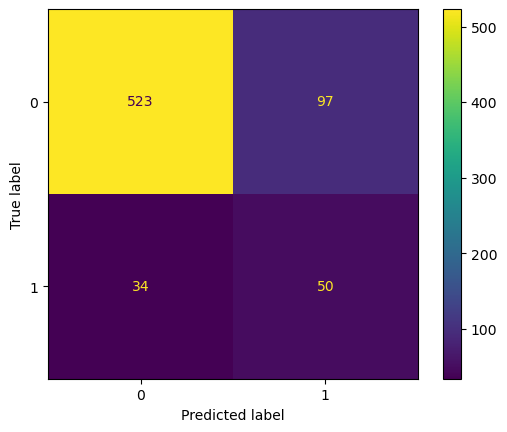

In [39]:
report_model(grid)

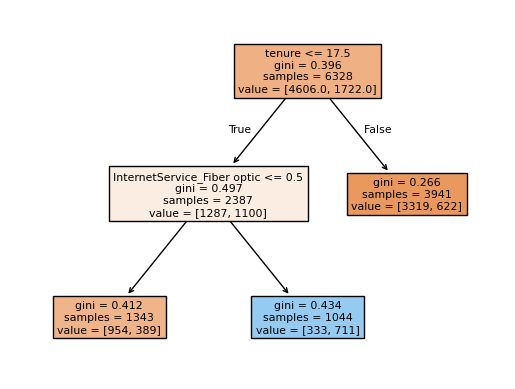

In [40]:
simple_tree_model_plot = DecisionTreeClassifier(max_depth = 2, max_leaf_nodes = 3)
simple_tree_model_plot.fit(X_train, y_train)
plot_tree(simple_tree_model_plot, feature_names = X.columns, filled = True);

In [41]:
simple_tree_model_plot.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.39731754, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.60268246, 0.        , 0.        ])

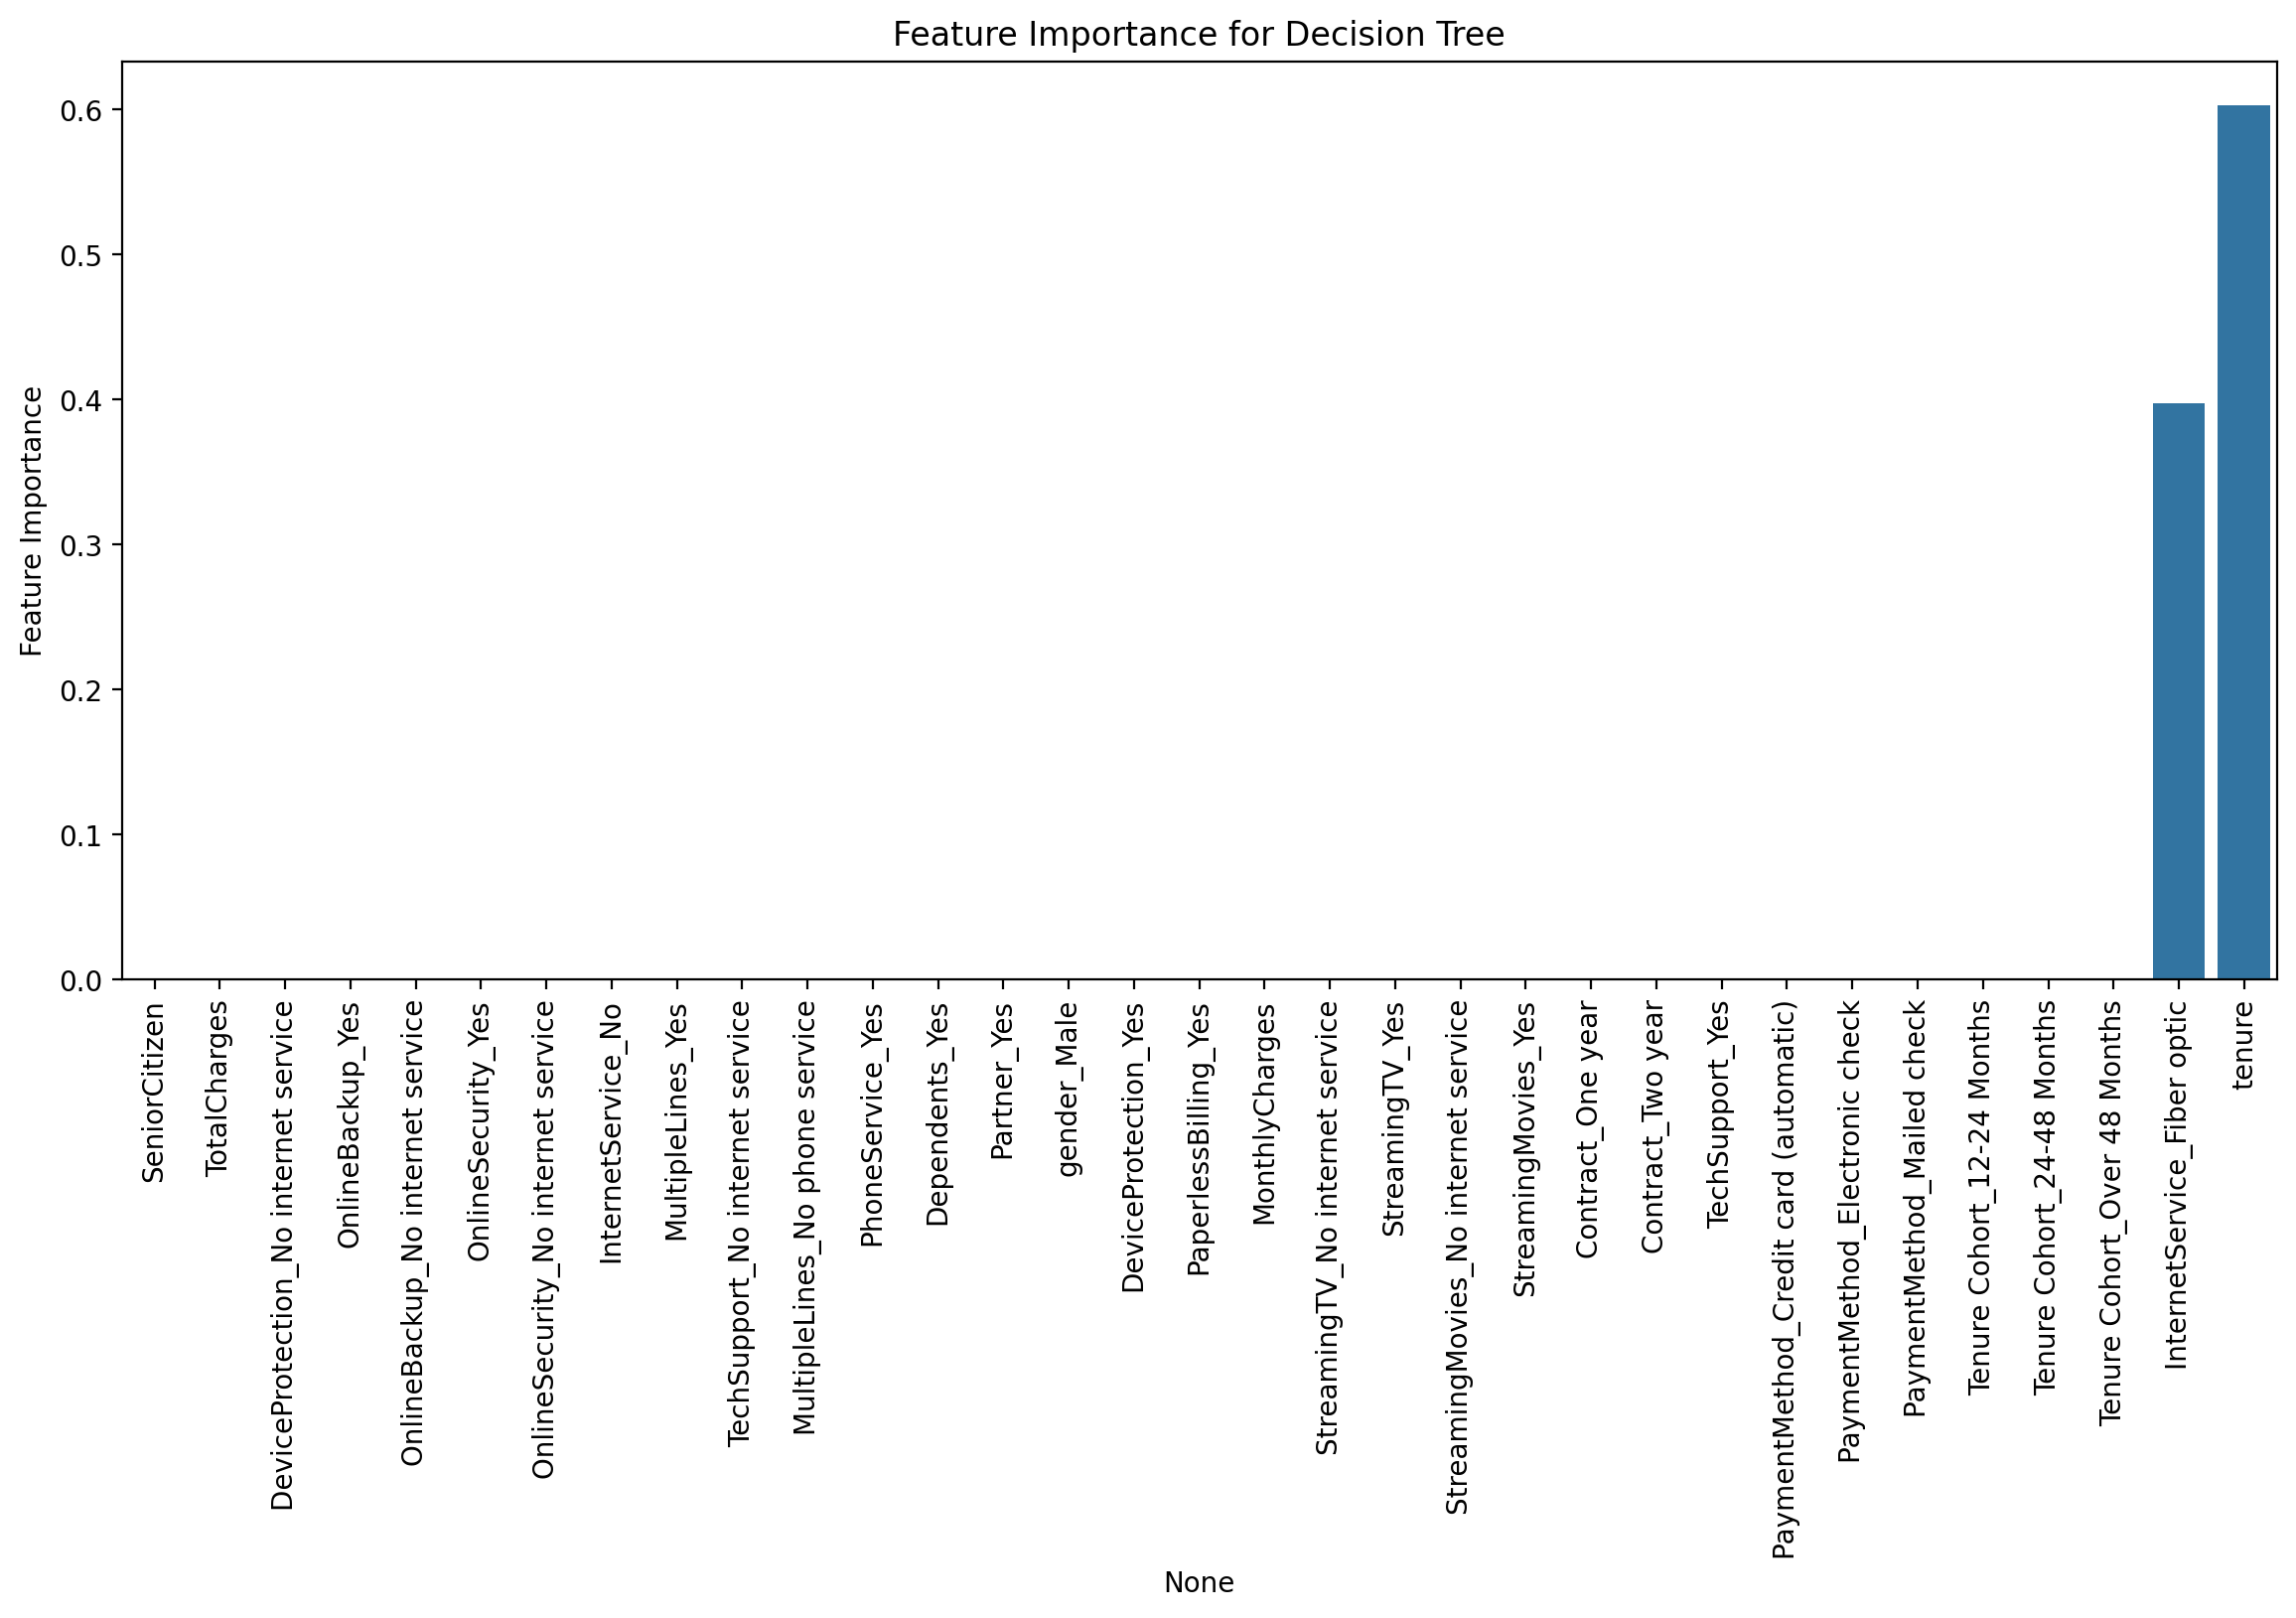

In [42]:
imp_feats = pd.DataFrame(data=simple_tree_model_plot.feature_importances_,
                         index=X.columns, columns=['Feature Importance']).sort_values("Feature Importance")
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rfc = RandomForestClassifier()

n_estimators=[11]
max_features= [4,5,6]
bootstrap = [True,False]
oob_score = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

grid = GridSearchCV(rfc, param_grid)
grid.fit(X_train, y_train)
grid.best_params_

D:\Program Files\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Program Files\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Program Files\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Program Files\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Program Files\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. T

{'bootstrap': True, 'max_features': 5, 'n_estimators': 11, 'oob_score': False}

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       567
           1       0.46      0.49      0.47       137

    accuracy                           0.79       704
   macro avg       0.67      0.67      0.67       704
weighted avg       0.79      0.79      0.79       704





<Figure size 1000x1000 with 0 Axes>

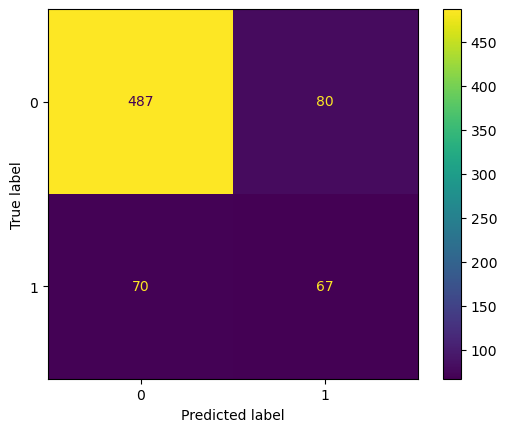

In [45]:
report_model(grid)

In [46]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [47]:
error_rates = []
for n in range(1,200):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

D:\Program Files\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Program Files\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Program Files\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\Program Files\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
D:\P

(0.15, 0.22)

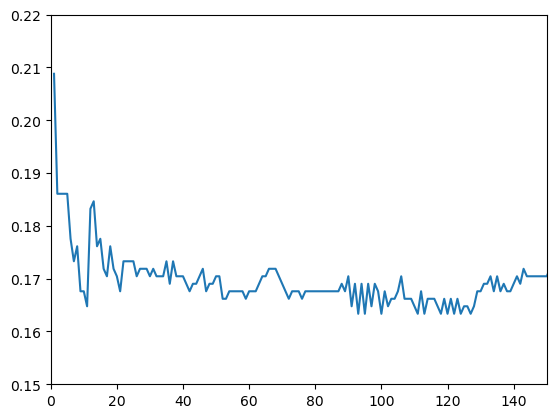

In [48]:
plt.plot(range(1,200),error_rates)
plt.xlim(0,150)
plt.ylim(0.15,0.22)

D:\Program Files\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      0.87      0.90       603
           1       0.45      0.65      0.53       101

    accuracy                           0.84       704
   macro avg       0.69      0.76      0.72       704
weighted avg       0.87      0.84      0.85       704





<Figure size 1000x1000 with 0 Axes>

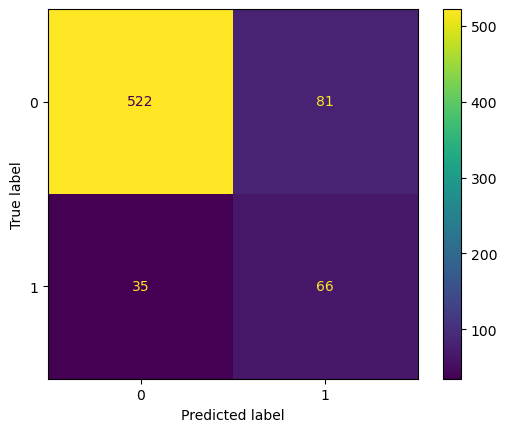

In [49]:
abc = AdaBoostClassifier(n_estimators = 11)
abc.fit(X_train, y_train)

report_model(abc)

In [50]:
param_grid = {'n_estimators':[10,11,35], 'max_depth':[3,4,5], 'learning_rate':[0.1,0.05,0.2]}
gb_model = GradientBoostingClassifier()
grid = GridSearchCV(gb_model, param_grid)
grid.fit(X_train, y_train)
grid.best_estimator_
grid.best_params_


{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 35}

In [51]:
grid.best_estimator_.feature_importances_

array([0.00758412, 0.        , 0.        , 0.        , 0.00267438,
       0.00306285, 0.00181045, 0.21810161, 0.0109161 , 0.00200083,
       0.01798019, 0.00897451, 0.        , 0.00561725, 0.        ,
       0.00766098, 0.00895619, 0.00370435, 0.00471117, 0.        ,
       0.00619576, 0.06242255, 0.07568389, 0.02043422, 0.        ,
       0.11872679, 0.        , 0.        , 0.        , 0.        ,
       0.34187521, 0.02582477, 0.04508183])

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       588
           1       0.48      0.60      0.53       116

    accuracy                           0.83       704
   macro avg       0.70      0.74      0.71       704
weighted avg       0.84      0.83      0.83       704





<Figure size 1000x1000 with 0 Axes>

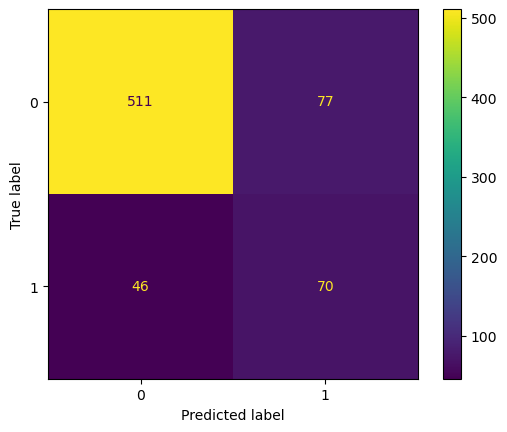

In [52]:
report_model(grid)